In [11]:
import pandas as pd
from tableone import TableOne
import pathlib
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
import numpy as np

In [12]:
path = pathlib.Path().resolve()
print(path)
columns_to_check = ['onset2COWCS','decade','logpop_M_diff', 'logpopdens_diff', 'logoutreg_diff', 'ecgrowth_demeaned', 'democracy_diff']

C:\Users\Janet\OneDrive - The University of Chicago\courses\Machine_learning\ECMA31350_Project-1\code\Summary_stat


In [13]:
columns = ['s1', 's2', 's6', 's10', 'onset2COWCS', 
           'logpop_M_diff', 'logpopdens_diff', 'logoutreg_diff', 'ecgrowth_demeaned', 'democracy_diff',
           'trans_outp_p']
# additional_columns = ['logmountain', 'ethnic_fractionalization', 'religion_fractionalization', 'language_fractionalization', 'leg_british', 'opec']
categorical = ['onset2COWCS']
# additional_categorical = ['leg_british', 'opec']
groupby = ['onset2COWCS']

In [14]:
def load_data(predictor):
    # df = pd.read_csv(str(path).replace("code/Summary_stat", "data/combined_data") + "/" + predictor + "_data.csv", na_values= '#DIV/0!')
    # df = pd.merge(df, iv, on=["country", "t"])

    current_dir = path.cwd()
    # Construct the path to the data directory relative to the current script's location
    data_dir = current_dir.parent.parent / 'data' / 'combined_data'
    data_file_path = data_dir / f"{predictor}_data.csv"

    # Load the data
    df = pd.read_csv(data_file_path, na_values='#DIV/0!')
    df[columns_to_check] = df[columns_to_check].replace([np.inf, -np.inf], np.nan)
    df = df.dropna(subset=columns_to_check)
    
    label = le.fit_transform(df['country'])
    df.drop('country', axis=1, inplace=True)
    df['country'] = label
    
    # df = df.set_index(['country', 't'])
    
    # df.fillna(0, inplace=True)
    return df



In [15]:
predictor_list = ["gvcomix", "gvcobp", "gvcofp"]
table_list = []
for predictor in predictor_list:
    df = load_data(predictor)
    df.to_csv(str(path)+"/"+ predictor + "_final_data.csv")
    table = TableOne(df, columns=columns, categorical = categorical, groupby = groupby, pval=True)
    table_list.append(table)
    

C:\Users\Janet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tableone\tableone.py:927: FutureWarning: The provided callable <function mean at 0x0000019E7EE0ADE0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_cont = pd.pivot_table(cont_data,
C:\Users\Janet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tableone\tableone.py:927: FutureWarning: The provided callable <function median at 0x0000019E7EF4A840> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df_cont = pd.pivot_table(cont_data,
C:\Users\Janet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0

In [16]:
def create_latex_table(df, file_name, replacements):
    summary_stats = df.describe().transpose()
    with open(file_name, 'w') as f:
        f.write('\\begin{table}[ht]\n')
        f.write('\\centering\n')
        f.write('\\begin{tabular}{lrrrrr}\n')
        f.write('\\toprule\n')
        
        f.write('Variable & N & Mean & Std & Min & Max \\\\\n')
        f.write('\\midrule\n')
        
        for index, row in summary_stats.iterrows():
            index = replacements.get(index, index)
            f.write(f"{index} & {row['count']:.0f} & {row['mean']:.3f} & {row['std']:.3f} & {row['min']:.3f} & {row['max']:.3f} \\\\\n")
        
        f.write('\\bottomrule\n')
        f.write('\\end{tabular}\n')
        f.write('\\caption{Descriptive statistics of the dataset.}\n')
        f.write('\\label{{tab:{file_name}}}\n') 
        f.write('\\end{table}\n')


replacements = {
    's1': 'Agriculture',
    's2': 'Fishing',
    's6': 'Wood and Paper',
    's10': 'Transport Equipment',
    's19': 'Transport' 
}


predictor_list = ["gvcomix", "gvcobp", "gvcofp"]
for predictor in predictor_list:
    df = load_data(predictor)
    # Pass the replacements dictionary to the function
    create_latex_table(df, f"{predictor}_summary_stats.tex", replacements)


In [17]:
#check precent missing in all vars in three datasets
predictor_list = ["gvcomix", "gvcobp", "gvcofp"]

for predictor in predictor_list:
    df = load_data(predictor)
    df.to_csv(str(path) + "/" + predictor + "_final_data.csv")
    
    missing_percentages = df.isna().mean() * 100
    print(f"\nPercentage of missing values for each variable in {predictor}:")
    print(missing_percentages)


Percentage of missing values for each variable in gvcomix:
t                               0.000000
s1                              0.000000
s2                              0.000000
s6                              0.000000
s10                             0.000000
s19                             0.000000
coup                            0.000000
onset2COWCS                     0.000000
periregular                   100.000000
decade                          0.000000
ecgrowth                        0.000000
milexp_pergdpSIPRI             24.872319
logpop_M                        0.000000
logpopdens                      0.000000
logoutreg                       0.000000
democracy                       0.000000
logmountain                    13.585291
ethnic_fractionalization        0.766088
religion_fractionalization      0.000000
language_fractionalization      2.757916
leg_british                     4.902962
opec                            0.000000
logpop_M_diff                   0.0000

Correlation Matrix

In [20]:
import pandas as pd
df = pd.read_csv('../../data/combined_data/merged_052423.csv')
df_clean = df[['oilreserves', 'oilreserves_full', 'oilreserves_public', 'onset2COWCS', 'decade', 
        'logpop_M_diff', 'logpopdens_diff', 'logoutreg_diff', 'ecgrowth_demeaned', 'democracy_diff',
          'logmountain', 'ethnic_fractionalization', 'religion_fractionalization', 'language_fractionalization', 'milexp_pergdpSIPRI',
          'leg_british', 'opec', 'gvcobp','gvcofp','gvcomix']]

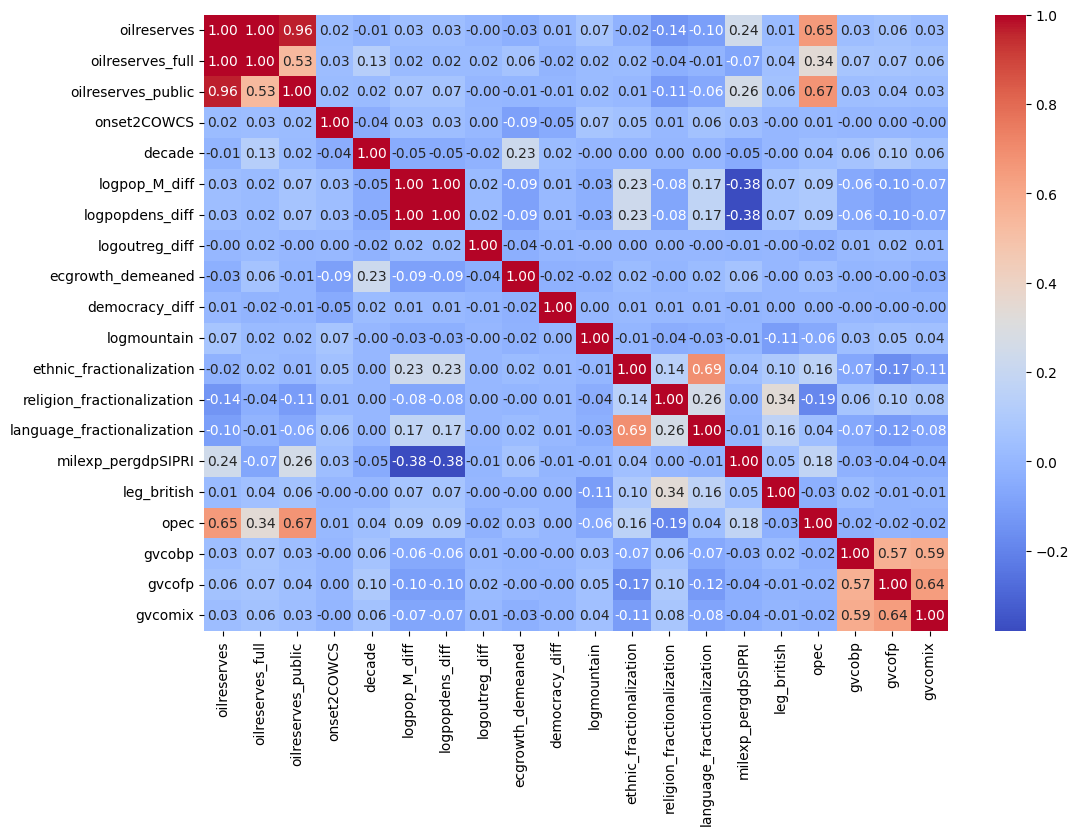

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df_clean.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()
